In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Importing necessary libraries

In [ ]:
# please uncomment and run the next line if yellowbrick library is not previously installed
#!pip install yellowbrick

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## Reading the Dataset

In [3]:
# loading the dataset
path = '/content/drive/MyDrive/marketing_campaign_dataset.csv'
#path = '/content/drive/MyDrive/Social_Media_Advertising.csv'
data = pd.read_csv(path)

## Overview of the Dataset

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [10]:
data.shape

(200000, 16)

* The dataset has 200000 rows and 16 columns

### Displaying few rows of the dataset

In [7]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
49673,49674,Alpha Innovations,Display,Women 35-44,15 days,Google Ads,0.05,"$8,869.00",7.05,Miami,French,495,4343,10,Foodies,2021-02-03
171551,171552,NexGen Systems,Display,Men 18-24,60 days,YouTube,0.14,"$12,836.00",3.27,New York,German,516,6322,1,Foodies,2021-01-02
5506,5507,Innovate Industries,Social Media,All Ages,30 days,YouTube,0.02,"$12,614.00",5.08,New York,French,874,5126,9,Tech Enthusiasts,2021-02-01
38370,38371,TechCorp,Display,Men 25-34,30 days,Google Ads,0.09,"$8,501.00",7.25,Houston,French,372,8947,4,Health & Wellness,2021-02-15
36930,36931,DataTech Solutions,Search,Men 18-24,45 days,Instagram,0.03,"$18,988.00",3.76,New York,French,366,5180,4,Outdoor Adventurers,2021-03-07
167783,167784,NexGen Systems,Social Media,All Ages,15 days,Email,0.12,"$10,617.00",5.62,New York,Mandarin,390,9404,6,Foodies,2021-09-06
67487,67488,Alpha Innovations,Search,Women 35-44,15 days,Facebook,0.07,"$19,042.00",3.63,New York,Spanish,308,3312,2,Tech Enthusiasts,2021-11-24
101486,101487,DataTech Solutions,Search,All Ages,30 days,Facebook,0.04,"$6,063.00",3.87,Miami,German,420,1527,10,Tech Enthusiasts,2021-01-17
131774,131775,DataTech Solutions,Email,All Ages,15 days,YouTube,0.03,"$16,519.00",4.61,Chicago,Mandarin,804,5653,9,Health & Wellness,2021-01-10
48246,48247,DataTech Solutions,Display,Men 18-24,45 days,Instagram,0.06,"$13,689.00",7.23,Los Angeles,English,617,7342,1,Foodies,2021-03-08


### Creating a copy of original data

In [11]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking the data types of the columns for the dataset

In [12]:
# let's look at the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

### We won't need Campaign_ID for analysis, so let's drop this column

In [13]:
df.drop("Campaign_ID", axis=1, inplace=True)

### Removing duplicate entries

In [14]:
# let's check for duplicate observations
df.duplicated().sum()

np.int64(0)

- There are no duplicate observations.

### Let's take a look at the summary of the data

In [23]:
df.describe()

,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.080070,5.002438,549.772030,5507.301520,5.494710
std,0.040602,1.734488,260.019056,2596.864286,2.872581
min,0.010000,2.000000,100.000000,1000.000000,1.000000
25%,0.050000,3.500000,325.000000,3266.000000,3.000000
50%,0.080000,5.010000,550.000000,5517.500000,5.000000
75%,0.120000,6.510000,775.000000,7753.000000,8.000000
max,0.150000,8.000000,1000.000000,10000.000000,10.000000


**Observations**



### Checking for missing values

In [16]:
# checking missing values
df.isna().sum()

,0
Company,0
Campaign_Type,0
Target_Audience,0
Duration,0
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,0
ROI,0
Location,0
Language,0


- There are no missing values in the data.

## Exploratory Data Analysis

### Univariate Analysis

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

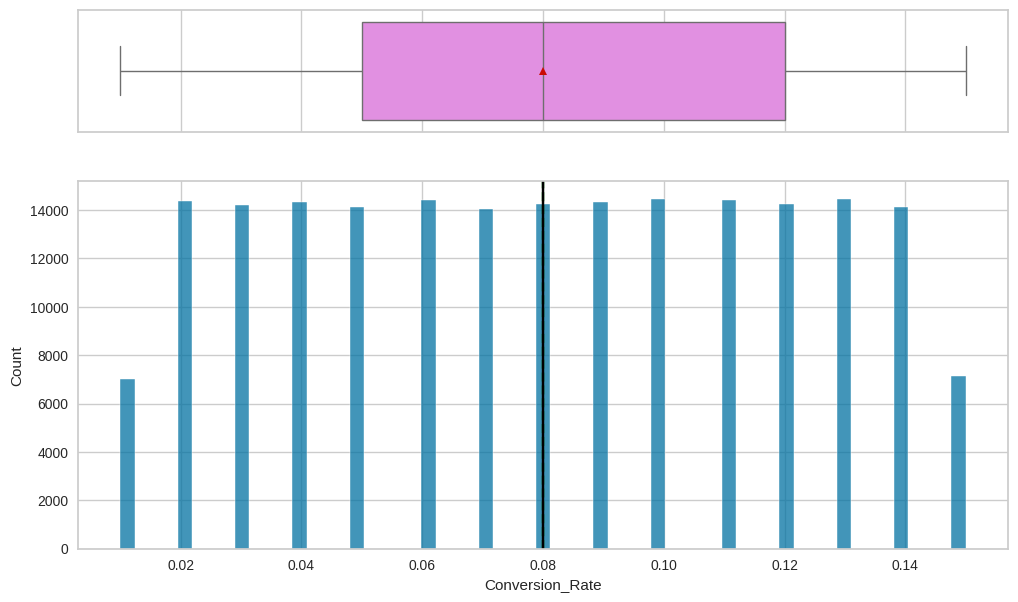

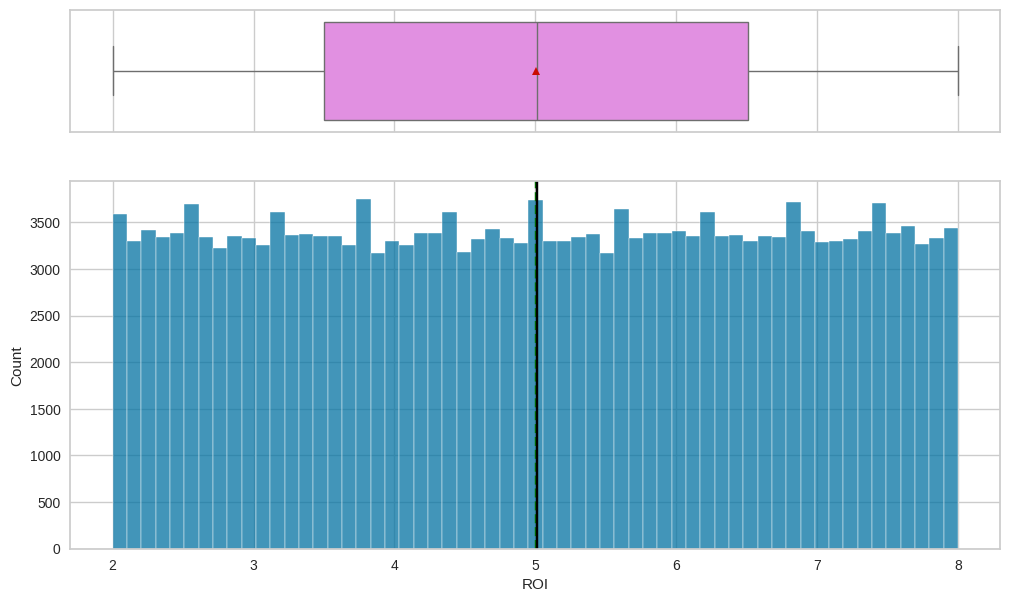

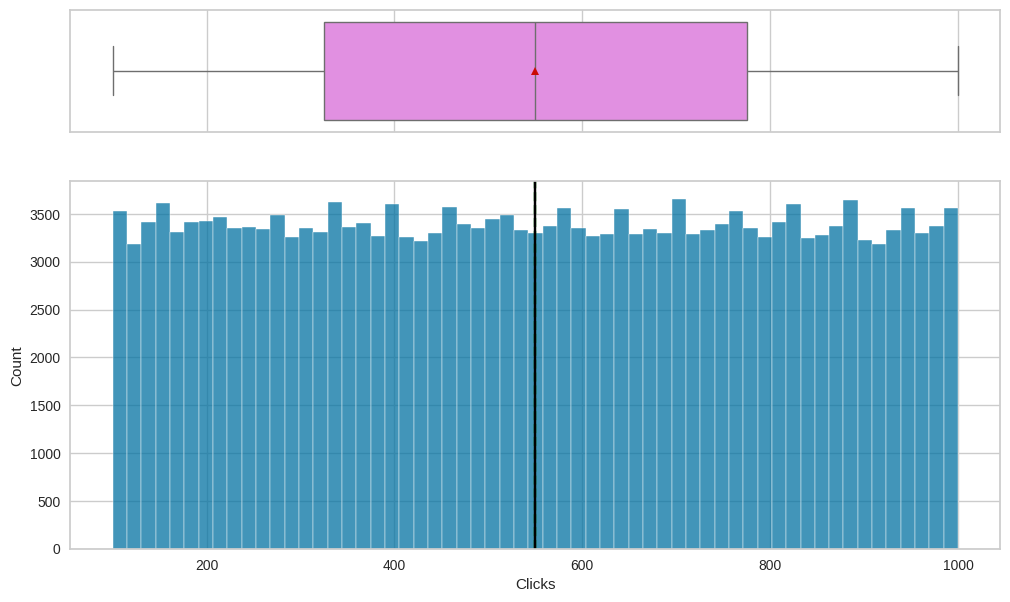

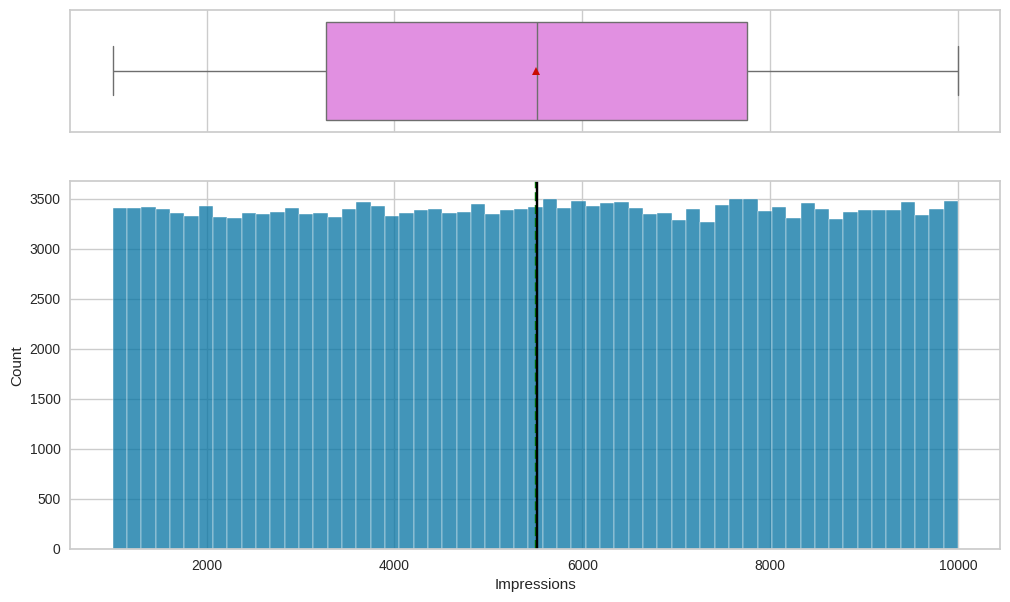

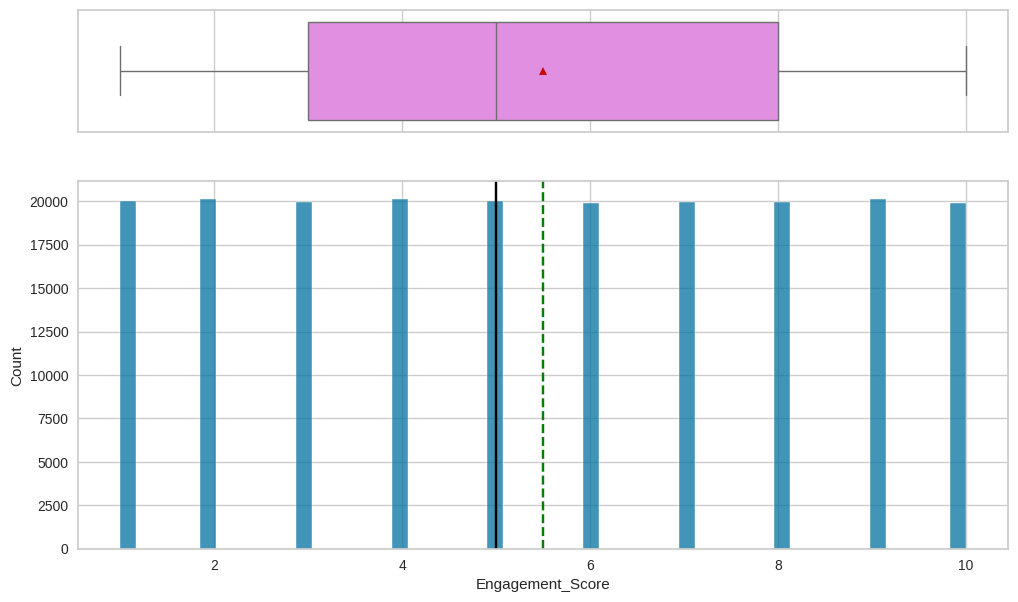

In [18]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item)

**Observations**


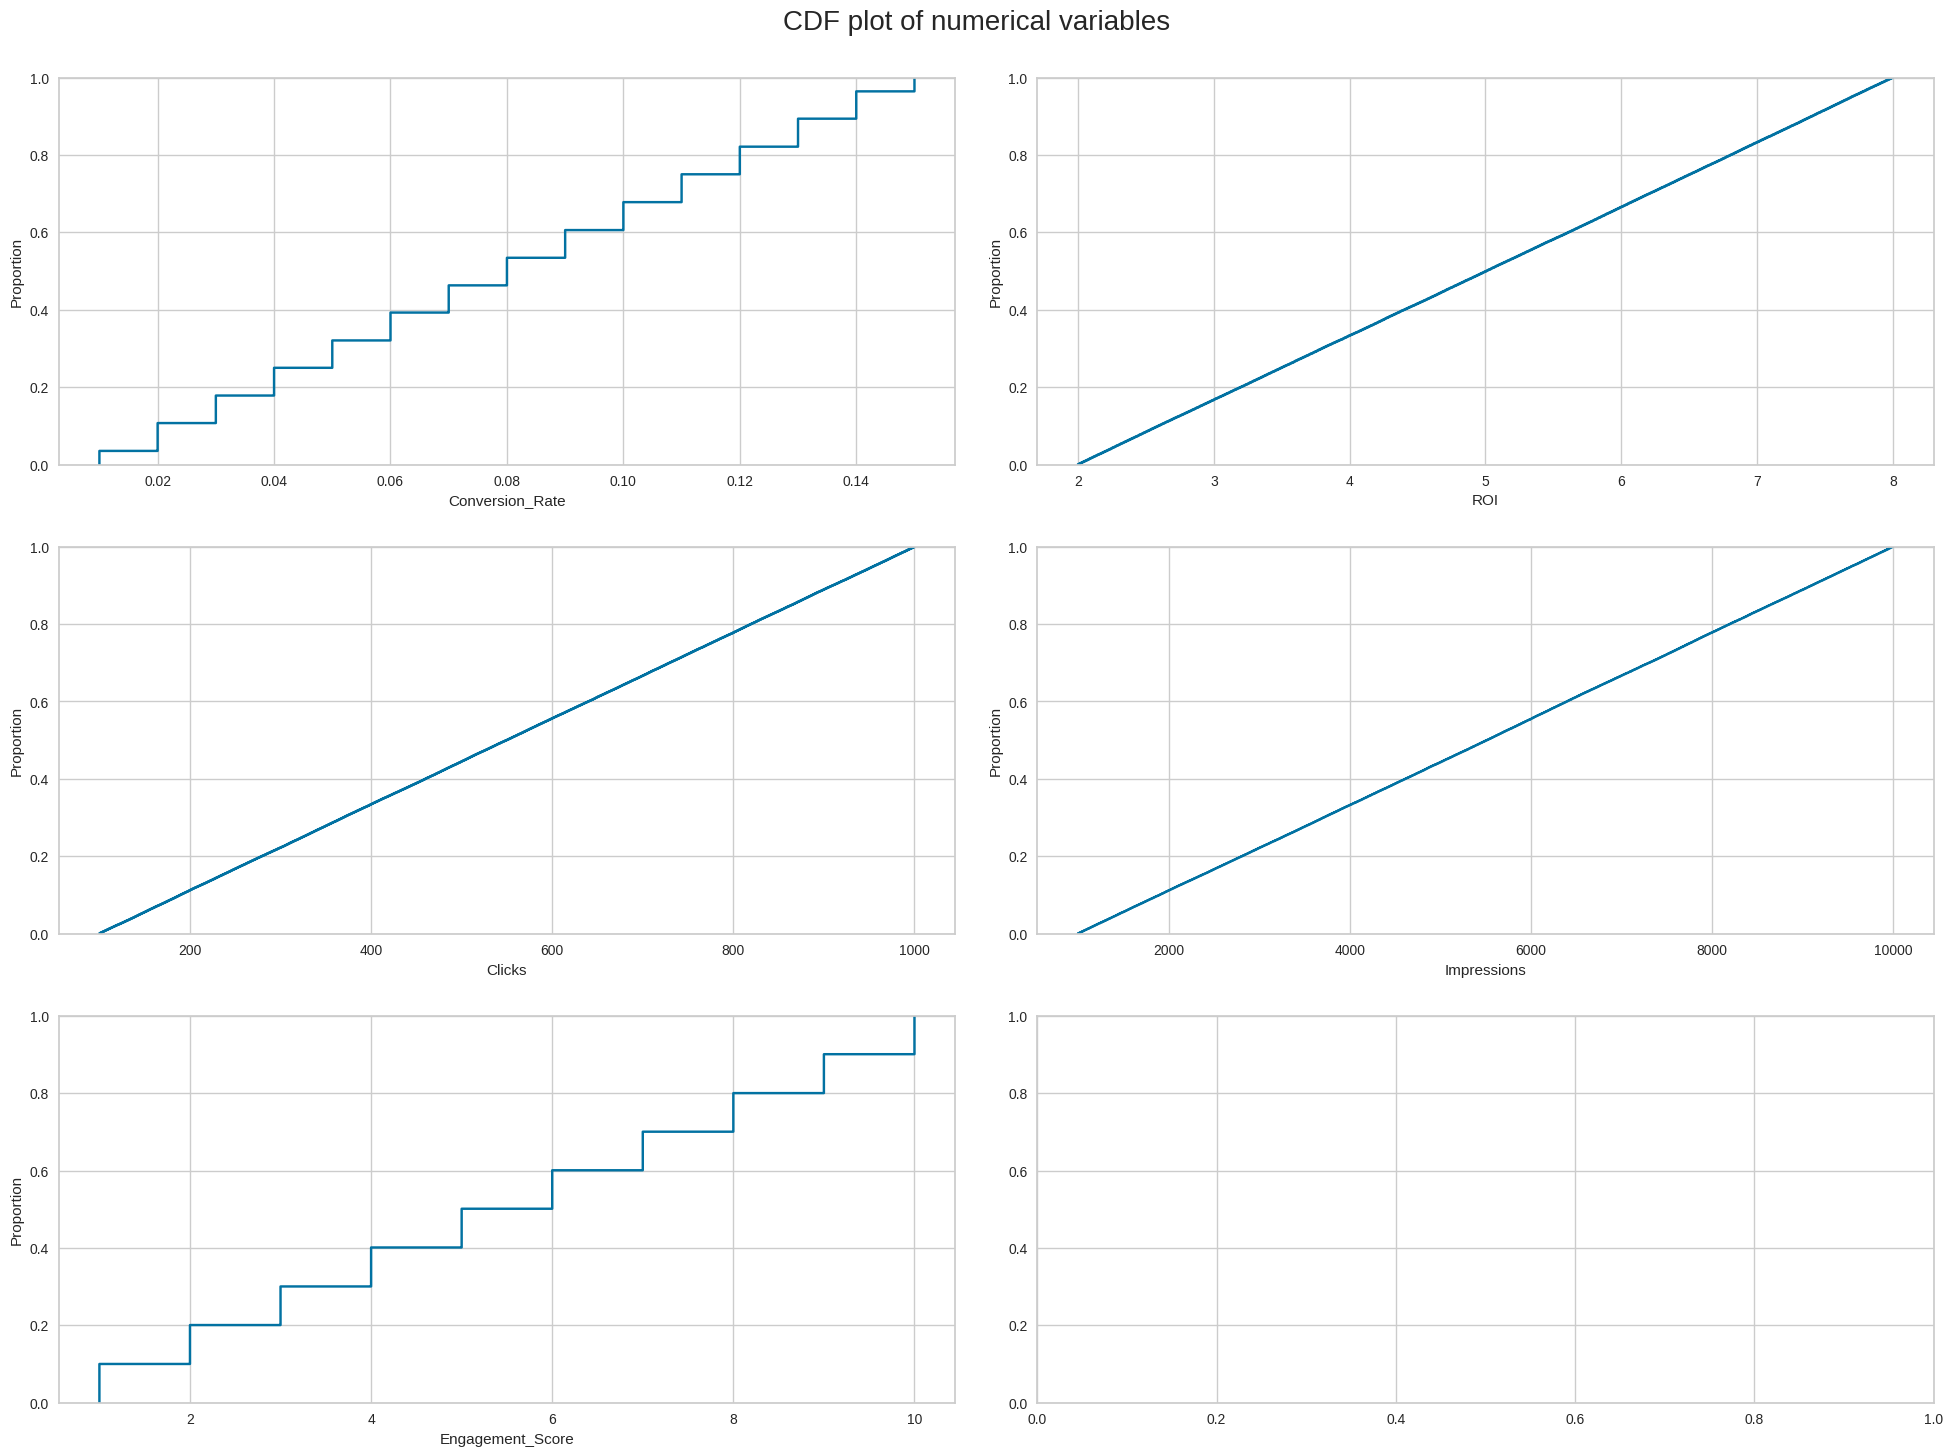

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

**Observations**


In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Observations**


### Bivariate Analysis

#### Let's check for correlations

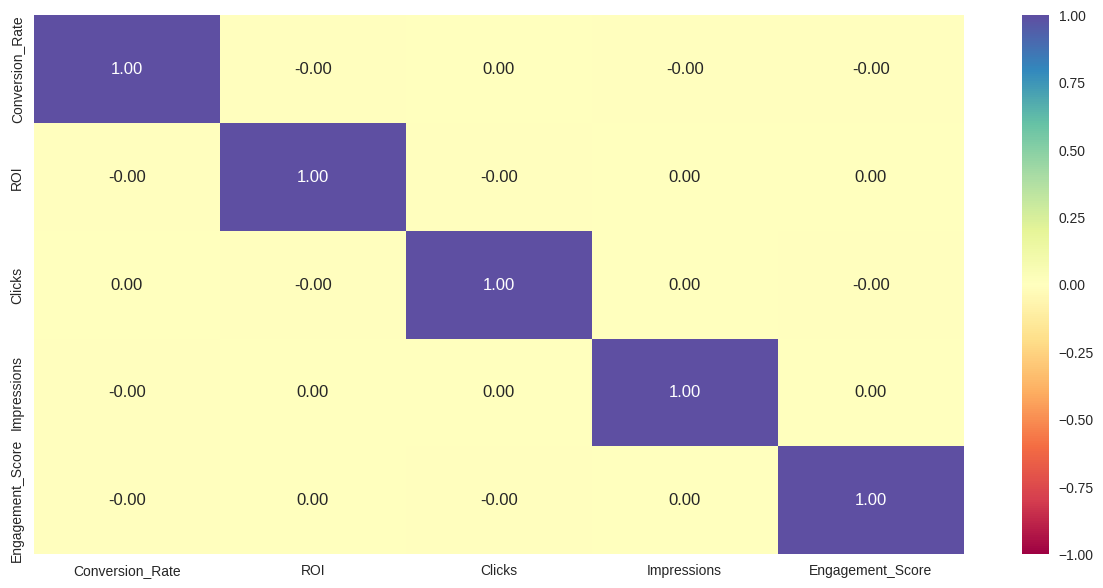

In [22]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**



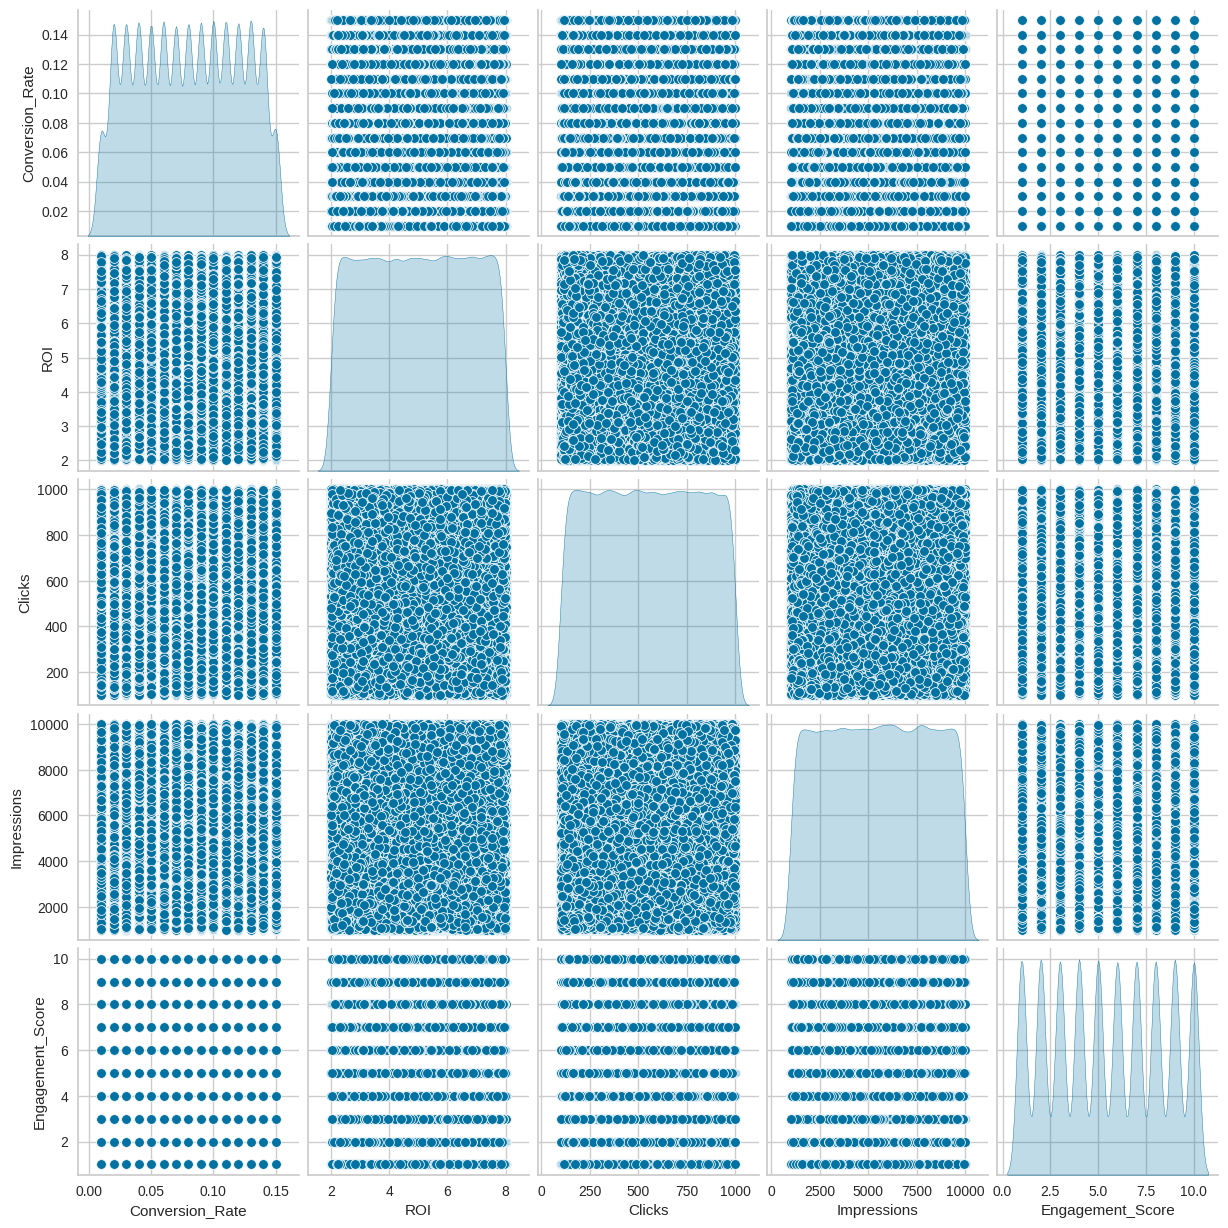

In [24]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

**Observations**



## Data Preprocessing

In [25]:
# variables used for clustering
num_col

['Conversion_Rate', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score']

In [26]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [27]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.1864953935536944
Number of Clusters: 2 	Average Distortion: 2.0098709015585894
Number of Clusters: 3 	Average Distortion: 1.8948849588693109
Number of Clusters: 4 	Average Distortion: 1.7986483914692637
Number of Clusters: 5 	Average Distortion: 1.7217135366635163
Number of Clusters: 6 	Average Distortion: 1.6545345204408501
Number of Clusters: 7 	Average Distortion: 1.6041294777215505
Number of Clusters: 8 	Average Distortion: 1.5530029872865165


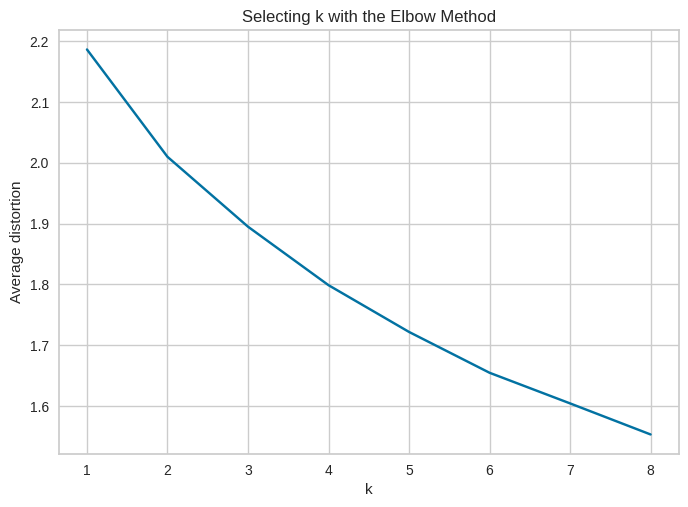

In [28]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()


Based on the Elbow method plot generated by the code, the best k value to choose is **3**.  The plot shows a significant decrease in distortion between k=1 and k=3, then the rate of decrease slows considerably, creating an "elbow" shape at k=3.  While there might be a slight further decrease in distortion with larger k values, the improvement is marginal, and selecting a larger k risks overfitting.  Therefore, the point of diminishing returns (the "elbow") suggests that k=3 is the optimal number of clusters.


**Appropriate value for k seems to be 3.

#### Let's check the silhouette scores

In [31]:
# sil_score = []
# cluster_list = list(range(2, 10))
#for n_clusters in cluster_list:
#    clusterer = KMeans(n_clusters=n_clusters)
#    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
#    score = silhouette_score(subset_scaled_df, preds)
#    sil_score.append(score)
#    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

# plt.plot(cluster_list, sil_score)
# plt.show()

In [33]:
# let's take 3 as number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [34]:
# adding kmeans cluster labels to the original and scaled dataframes

df["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

## Cluster Profiling

In [35]:
cluster_profile = df.groupby("K_means_segments").mean(numeric_only = True)

In [36]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
K_means_segments,,,,,
0,0.080682,3.344508,550.369697,5498.332479,3.789756
1,0.079906,5.089670,550.216813,5519.884615,8.512838
2,0.079648,6.577539,548.626750,5501.136575,3.563512


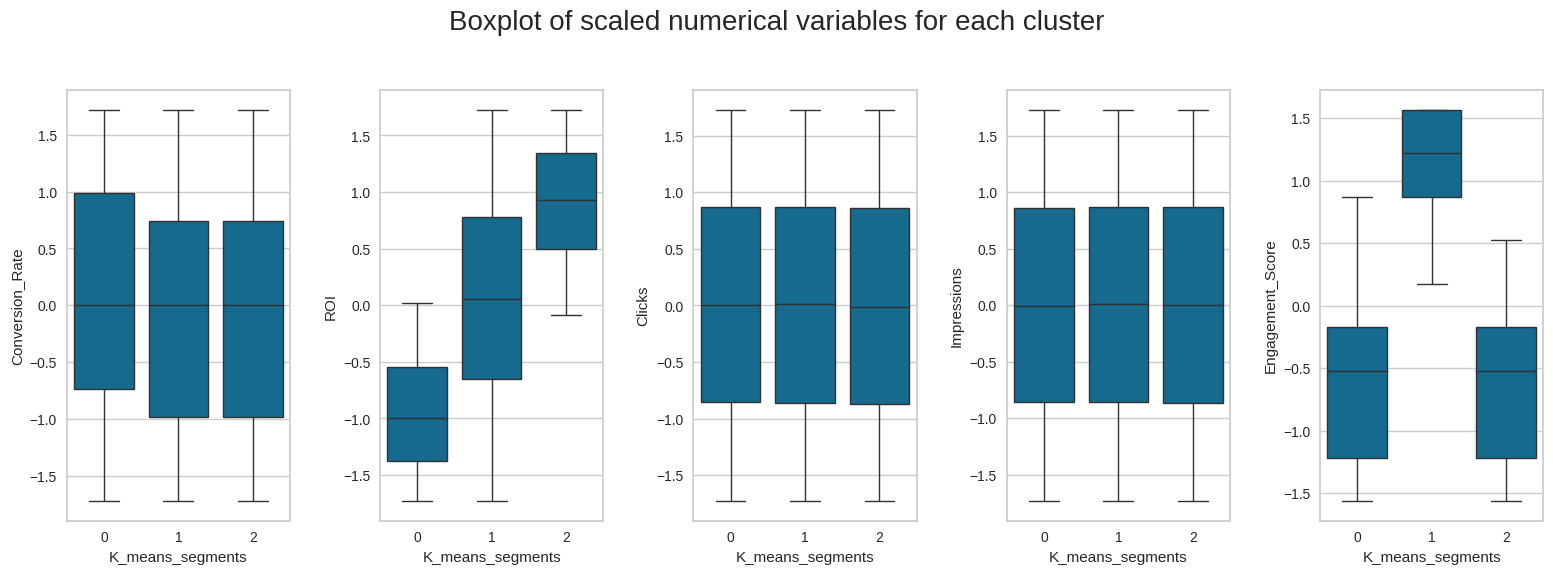

In [37]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

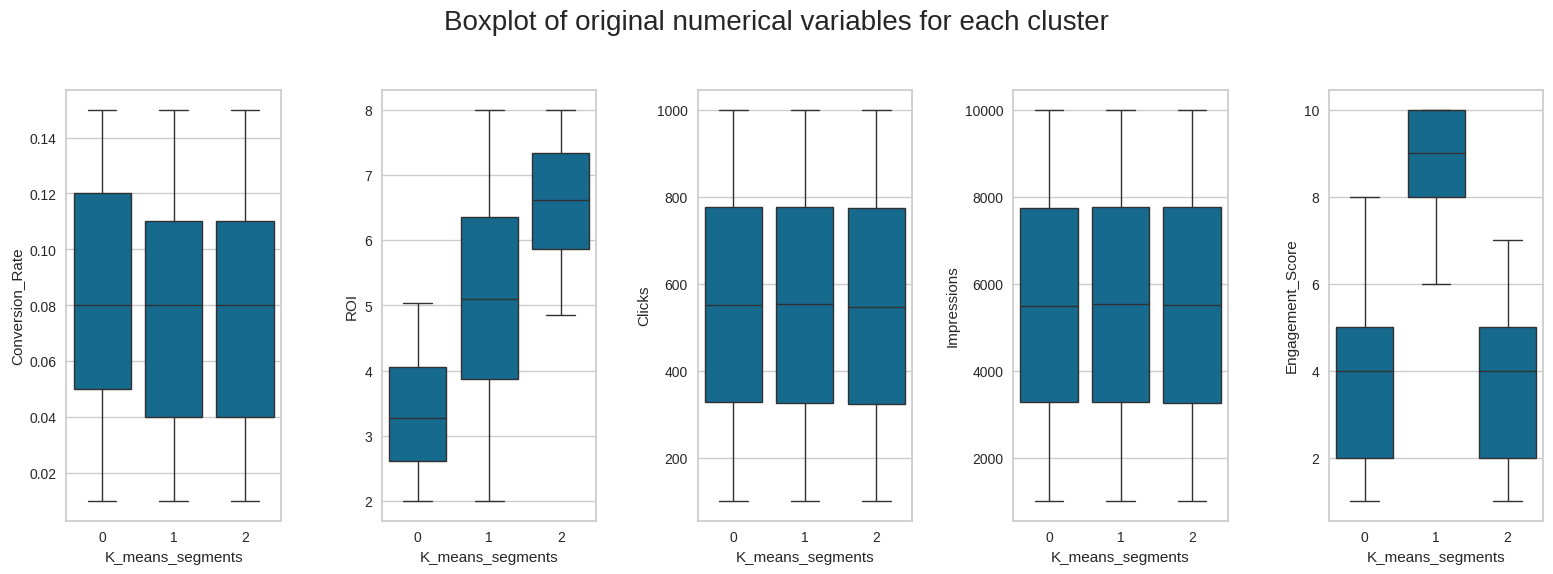

In [38]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

## Insights

-cluster 0

#### Let's compare Cluster vs Brand

In [ ]:
pd.crosstab(df.K_means_segments, df.Brand).style.highlight_max(
    color="lightgreen", axis=0
)

Brand,Adidas Adidas ORIGINALS,Adidas CORE / NEO,Adidas ORIGINALS,Adidas SPORT PERFORMANCE,Nike
K_means_segments,,,,,
0,0,18,53,23,173
1,0,227,166,101,169
2,1,866,564,356,0
3,0,0,123,126,185


**Observations**



## Business Recommendations

- Cluster 0 consists of premium products, so focused marketing campaigns can be done to target customers with higher purchasing power.
- Cluster 0 products can also be made available in showrooms situated in premium locations because people generally tend to buy premium products from showrooms.
- Cluster 1 consists of products that are sold at higher discounts, so these might be the ones that are introduced in large quantity during festive sales (like Christmas, Black Friday, New Year, etc). This strategy can be continued with high inventory.
- Cluster 2 and 3 consists of products with comparatively low and medium prices with almost no discount, so general marketing campaigns can be done for these to target the general public.

## Reading the Dataset

In [39]:
# loading the dataset
# path = '/content/drive/MyDrive/marketing_campaign_dataset.csv'
path = '/content/drive/MyDrive/Social_Media_Advertising.csv'
data = pd.read_csv(path)

## Overview of the Dataset

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [40]:
data.shape

(300000, 16)

* The dataset has 200000 rows and 16 columns

### Displaying few rows of the dataset

In [41]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company
205179,881607,Men 25-34,Product Launch,45 Days,Facebook,0.10,$10428.54,3.740000,Los Angeles,English,27515,83020,6,Technology,2022-11-30,Gadget Giants
101710,235334,Women 18-24,Market Expansion,30 Days,Instagram,0.07,$5412.27,2.400000,Austin,Spanish,13891,42667,6,Food,2022-03-18,Culinary Quest
89106,817679,Women 35-44,Market Expansion,30 Days,Facebook,0.05,$4802.60,3.760000,Austin,Spanish,12232,37751,2,Fashion,2022-04-02,Vogue Visions
193046,220003,Women 45-60,Market Expansion,45 Days,Facebook,0.14,$9836.36,5.500000,Miami,French,25917,78288,6,Fashion,2022-01-18,Silk & Style
99093,812319,All Ages,Product Launch,30 Days,Facebook,0.10,$5283.33,3.940000,Austin,Spanish,13547,41646,9,Health,2022-11-25,Well Wish
105506,398942,Women 18-24,Brand Awareness,30 Days,Instagram,0.13,$5593.58,1.000000,Miami,French,14391,44147,7,Health,2022-04-17,Vigor Valley
298780,185679,Women 25-34,Brand Awareness,60 Days,Facebook,0.08,$15000.00,1.760000,Austin,English,39839,119524,2,Food,2022-04-21,Savor Street
44748,124406,All Ages,Brand Awareness,15 Days,Pinterest,0.13,$2613.13,0.945573,Miami,Spanish,3753,13204,1,Fashion,2022-11-26,Trend Tailors
288650,555241,All Ages,Market Expansion,60 Days,Facebook,0.09,$15000.00,7.430000,Miami,Spanish,38505,115573,6,Food,2022-02-21,Nosh Nirvana
55207,225162,Women 45-60,Market Expansion,15 Days,Twitter,0.11,$3150.90,1.510000,Miami,French,7768,24530,9,Health,2022-08-27,Pulse Point


### Creating a copy of original data

In [42]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking the data types of the columns for the dataset

In [43]:
# let's look at the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       300000 non-null  int64  
 1   Target_Audience   300000 non-null  object 
 2   Campaign_Goal     300000 non-null  object 
 3   Duration          300000 non-null  object 
 4   Channel_Used      300000 non-null  object 
 5   Conversion_Rate   300000 non-null  float64
 6   Acquisition_Cost  300000 non-null  object 
 7   ROI               300000 non-null  float64
 8   Location          300000 non-null  object 
 9   Language          300000 non-null  object 
 10  Clicks            300000 non-null  int64  
 11  Impressions       300000 non-null  int64  
 12  Engagement_Score  300000 non-null  int64  
 13  Customer_Segment  300000 non-null  object 
 14  Date              300000 non-null  object 
 15  Company           300000 non-null  object 
dtypes: float64(2), int64

### We won't need Campaign_ID for analysis, so let's drop this column

In [44]:
df.drop("Campaign_ID", axis=1, inplace=True)

### Removing duplicate entries

In [45]:
# let's check for duplicate observations
df.duplicated().sum()

np.int64(0)

- There are no duplicate observations.

### Let's take a look at the summary of the data

In [46]:
df.describe()

,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.080009,3.177691,18153.670370,56034.236387,4.369217
std,0.040563,2.461200,11027.023294,32583.136334,3.156492
min,0.010000,0.000000,293.000000,1937.000000,1.000000
25%,0.050000,0.930000,8821.000000,28362.000000,1.000000
50%,0.080000,2.670000,17230.000000,54098.000000,4.000000
75%,0.110000,5.330000,26808.000000,80925.250000,7.000000
max,0.150000,8.000000,40000.000000,120000.000000,10.000000


**Observations**



### Checking for missing values

In [47]:
# checking missing values
df.isna().sum()

,0
Target_Audience,0
Campaign_Goal,0
Duration,0
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,0
ROI,0
Location,0
Language,0
Clicks,0


- There are no missing values in the data.

## Exploratory Data Analysis

### Univariate Analysis

In [48]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

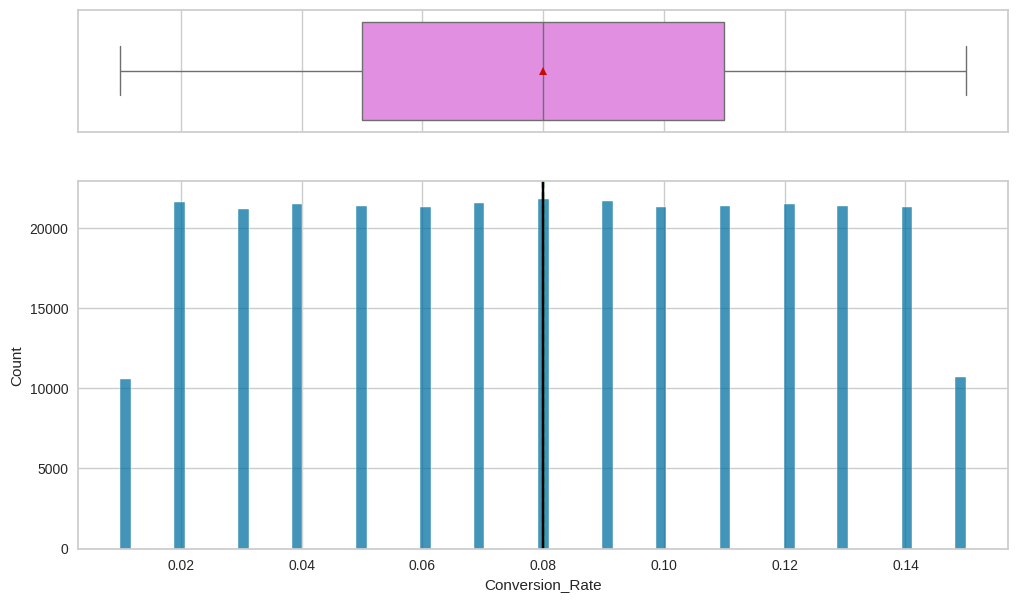

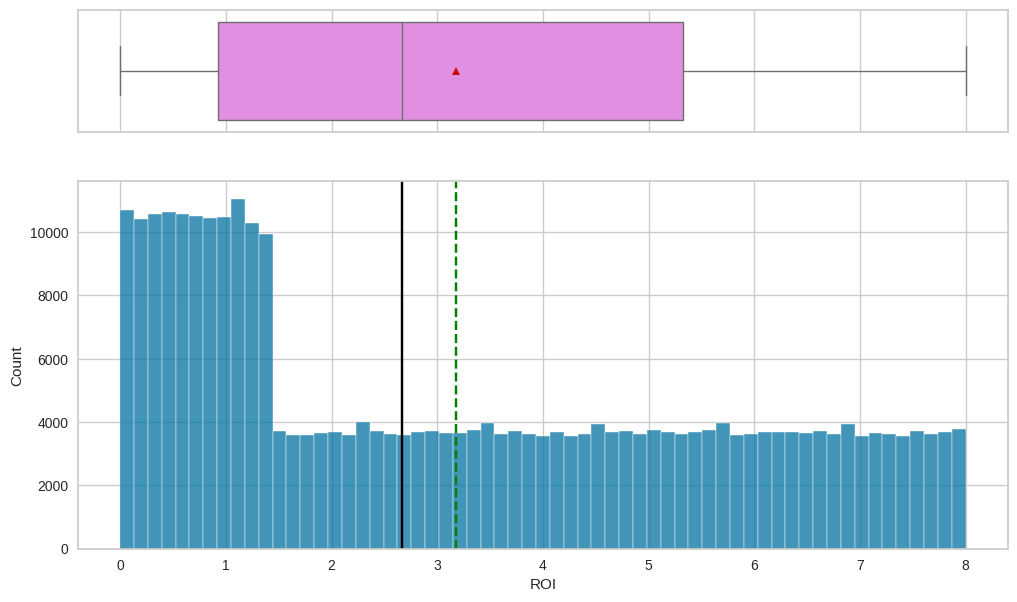

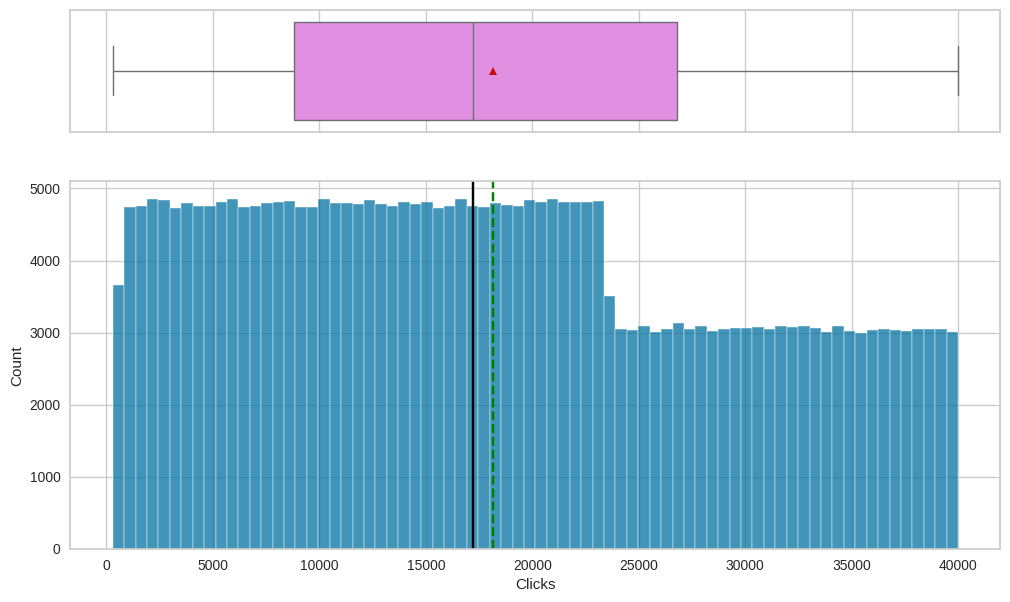

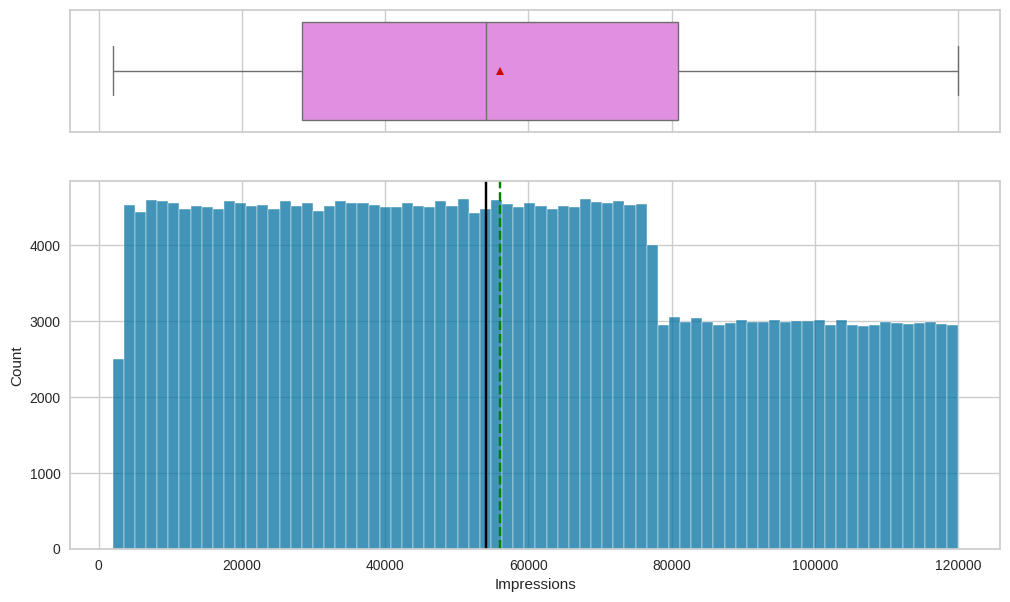

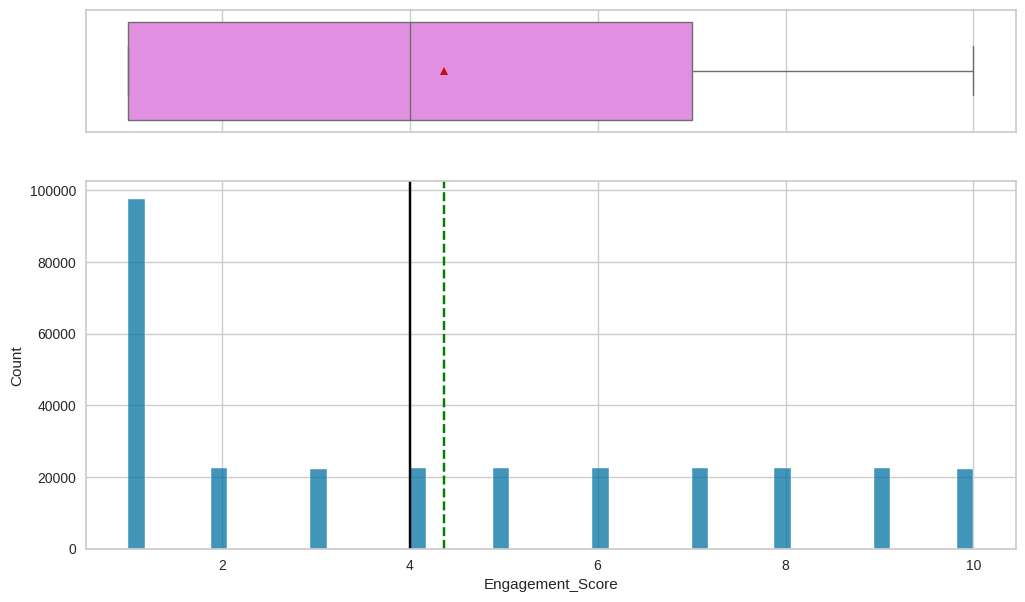

In [49]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item)

**Observations**


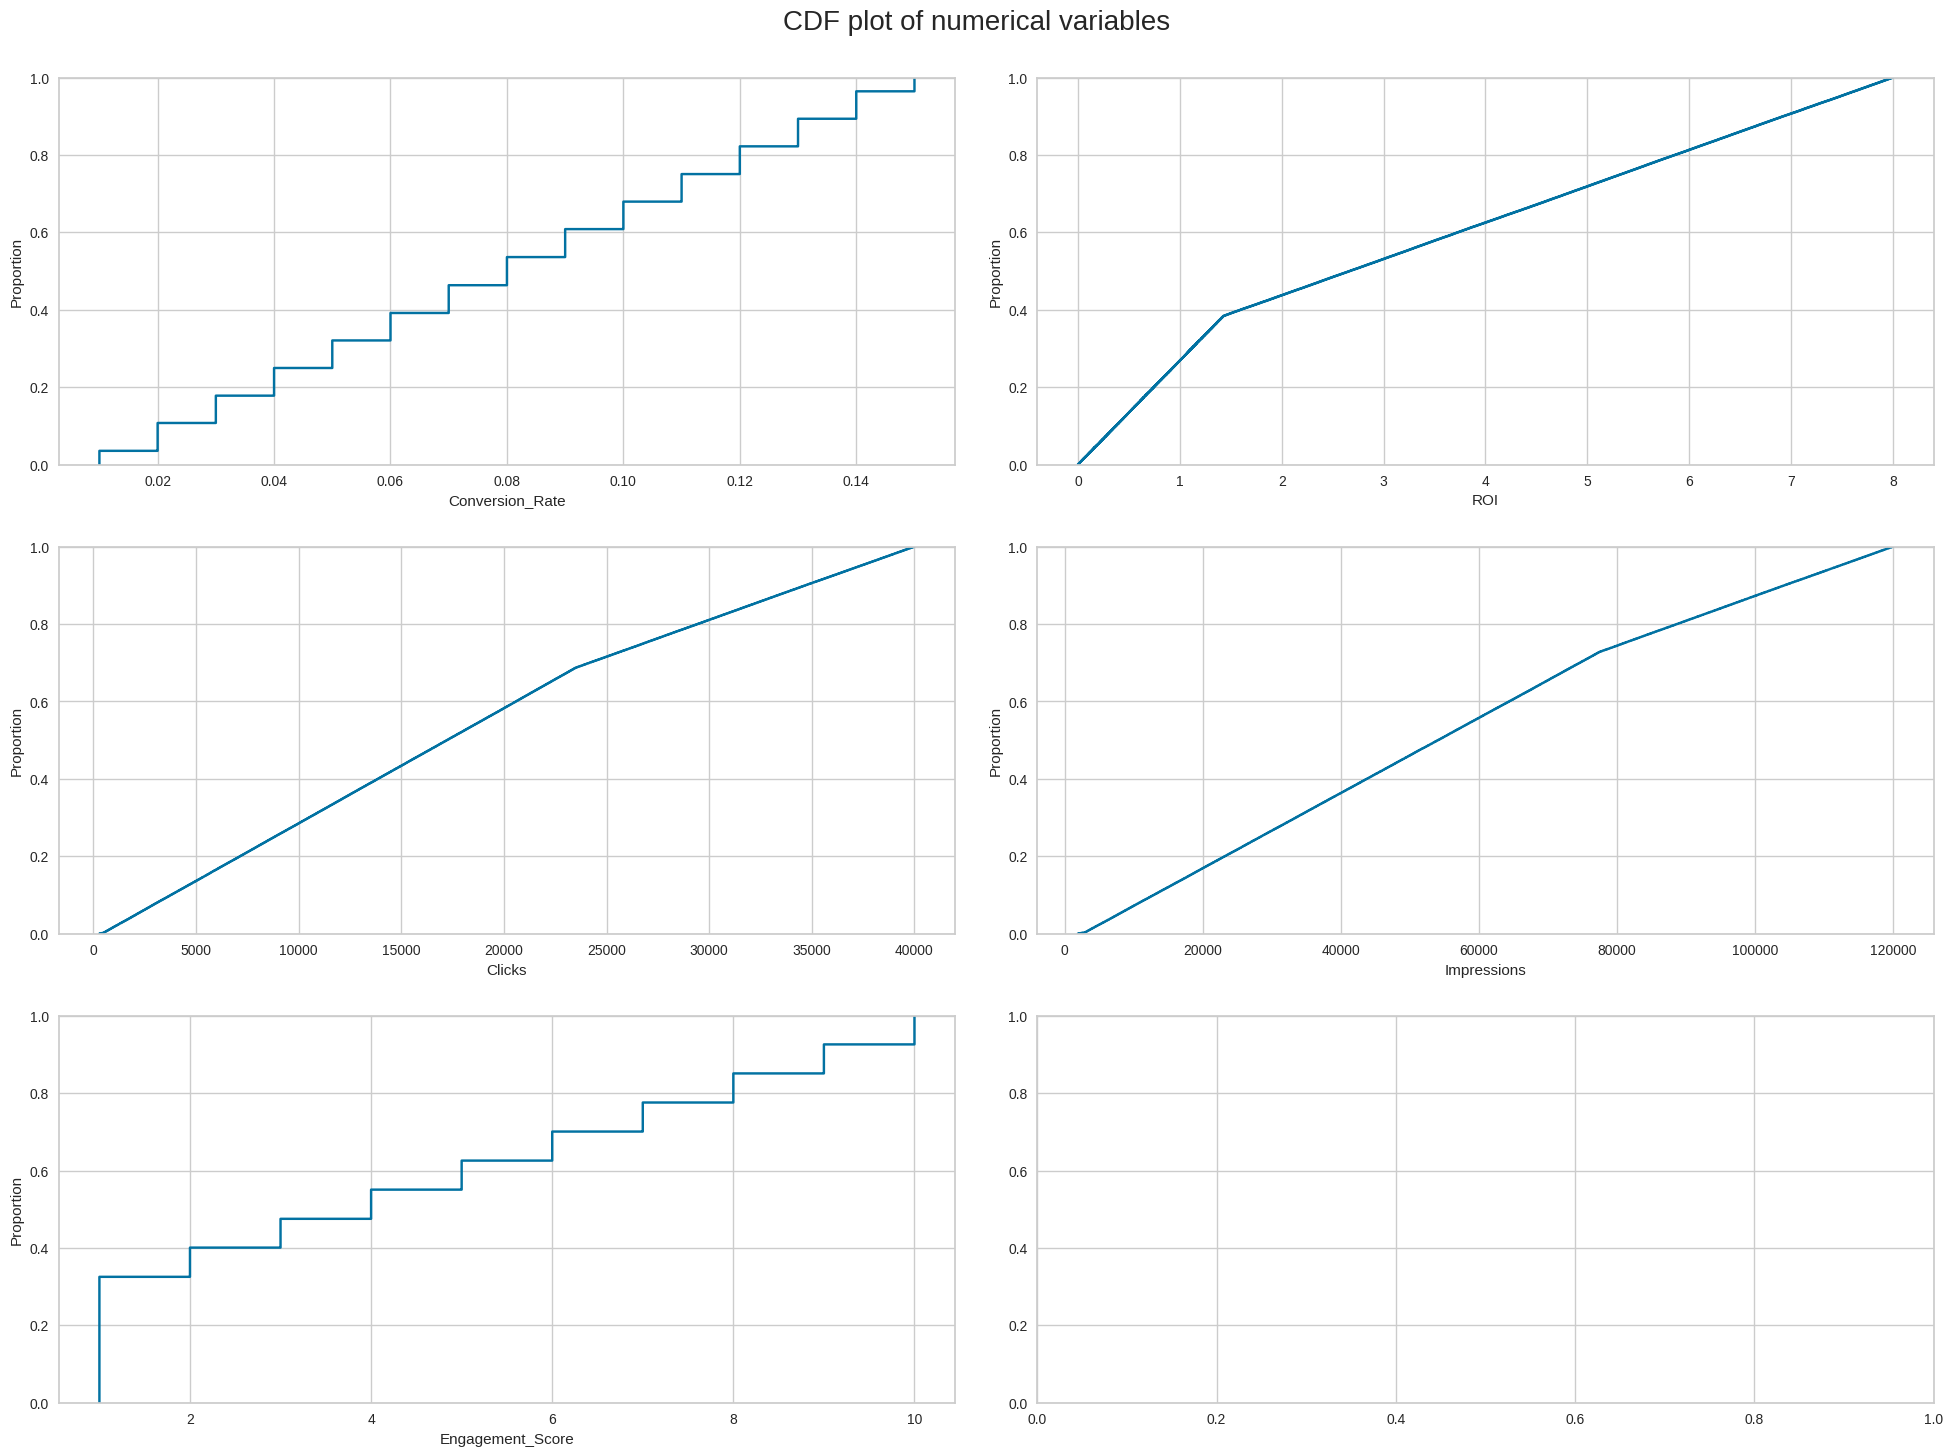

In [50]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

**Observations**


In [51]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Observations**


### Bivariate Analysis

#### Let's check for correlations

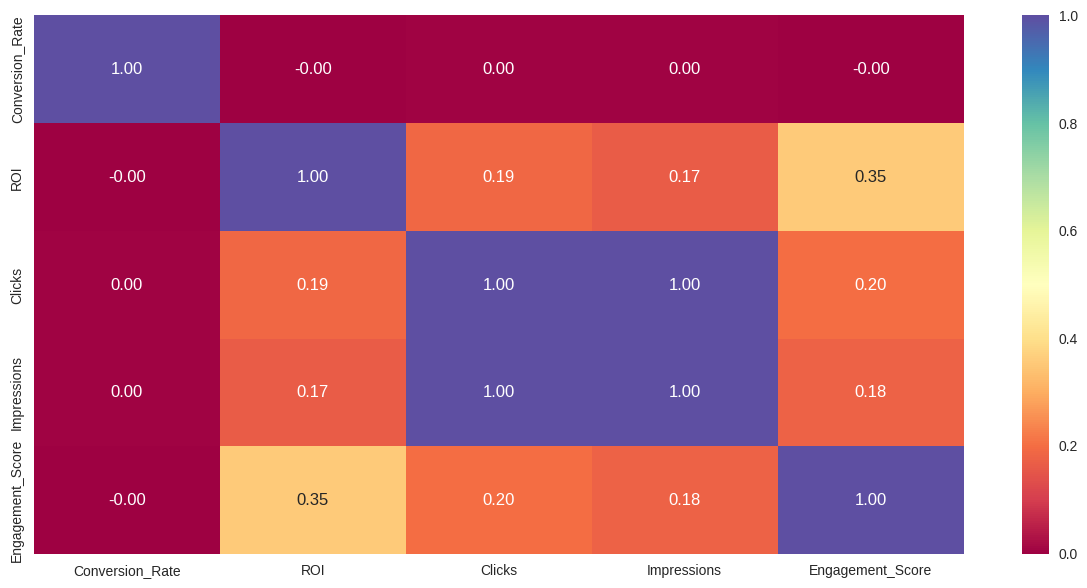

In [52]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True,  fmt=".2f", cmap="Spectral")
plt.show()

**Observations**



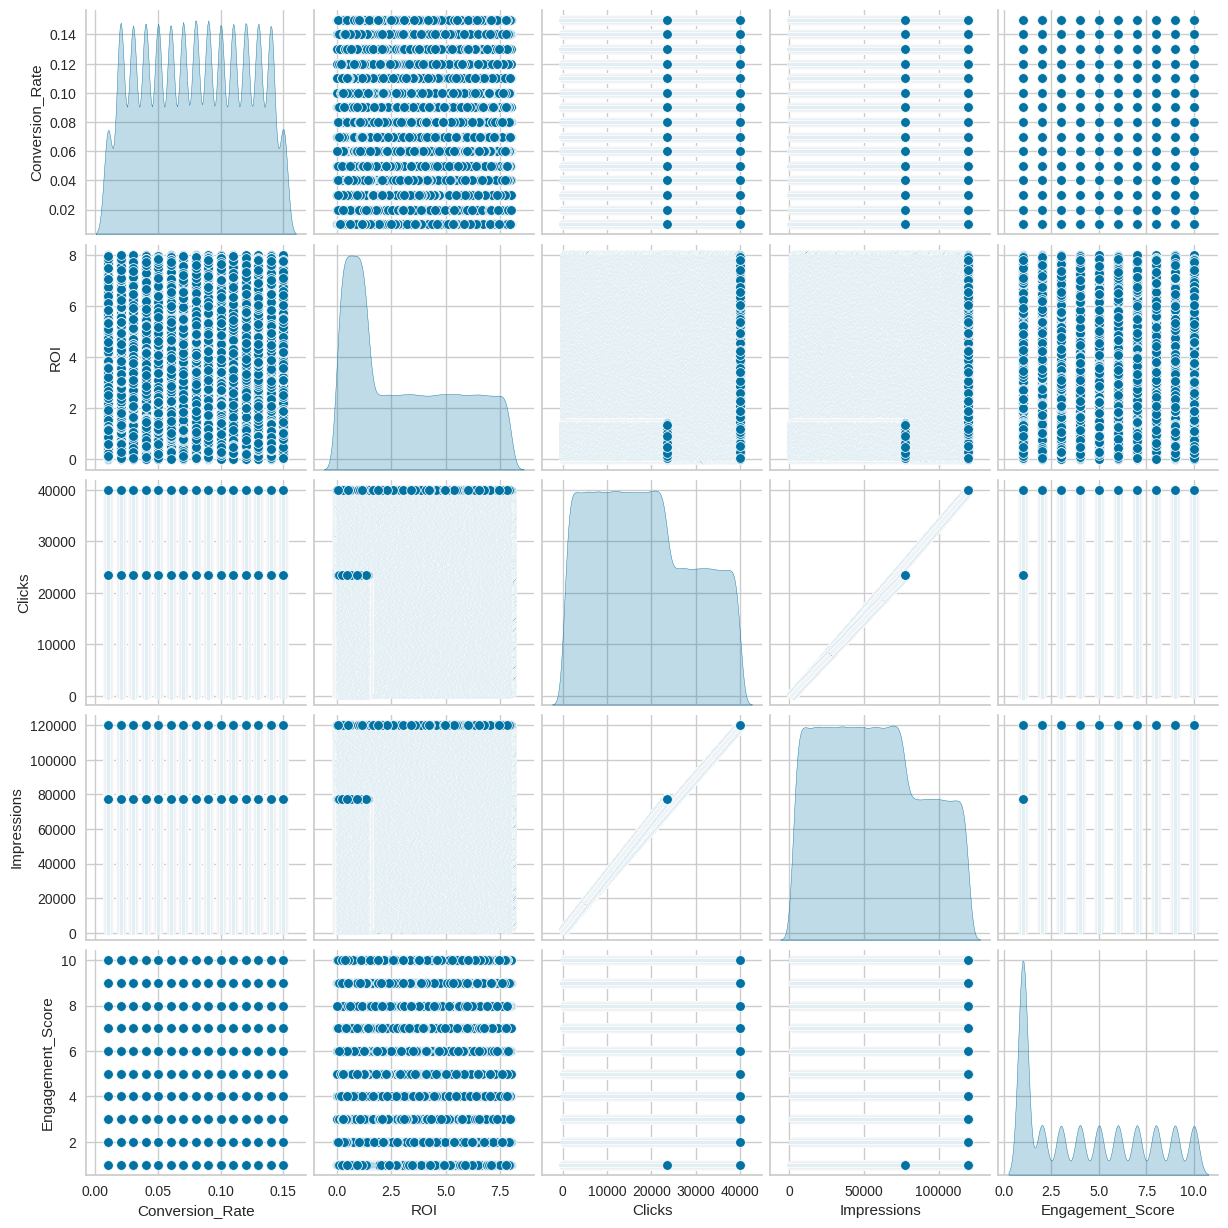

In [53]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

**Observations**



## Data Preprocessing

In [54]:
# variables used for clustering
num_col

['Conversion_Rate', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score']

In [55]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [56]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.1631347932448457
Number of Clusters: 2 	Average Distortion: 1.7887721320489522
Number of Clusters: 3 	Average Distortion: 1.5839817277782136
Number of Clusters: 4 	Average Distortion: 1.4990816770348108
Number of Clusters: 5 	Average Distortion: 1.4107393601991298
Number of Clusters: 6 	Average Distortion: 1.3373746884181985
Number of Clusters: 7 	Average Distortion: 1.2784745423292743
Number of Clusters: 8 	Average Distortion: 1.2314002338006085


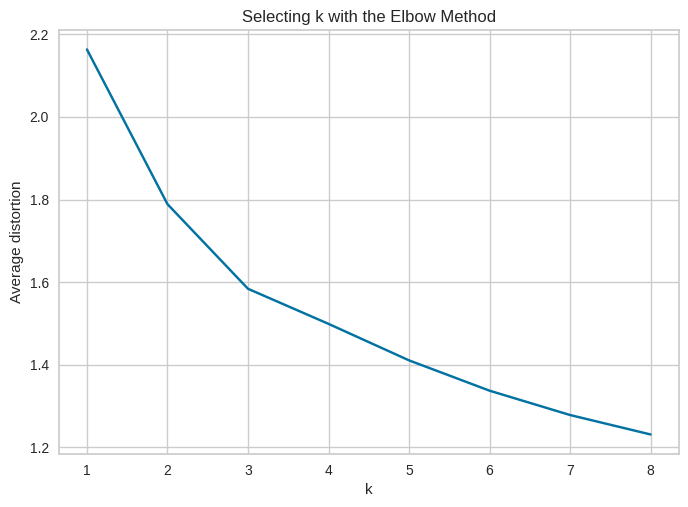

In [57]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()


Based on the Elbow method plot generated by the code, the best k value to choose is **3**.  The plot shows a significant decrease in distortion between k=1 and k=3, then the rate of decrease slows considerably, creating an "elbow" shape at k=3.  While there might be a slight further decrease in distortion with larger k values, the improvement is marginal, and selecting a larger k risks overfitting.  Therefore, the point of diminishing returns (the "elbow") suggests that k=3 is the optimal number of clusters.


**Appropriate value for k seems to be 3.

#### Let's check the silhouette scores

In [ ]:
# sil_score = []
# cluster_list = list(range(2, 10))
#for n_clusters in cluster_list:
#    clusterer = KMeans(n_clusters=n_clusters)
#    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
#    score = silhouette_score(subset_scaled_df, preds)
#    sil_score.append(score)
#    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

# plt.plot(cluster_list, sil_score)
# plt.show()

In [58]:
# let's take 3 as number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [59]:
# adding kmeans cluster labels to the original and scaled dataframes

df["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

## Cluster Profiling

In [60]:
cluster_profile = df.groupby("K_means_segments").mean(numeric_only = True)

In [61]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
K_means_segments,,,,,
0,0.080131,1.046824,12175.789052,39661.825184,1.531699
1,0.080081,4.060375,30642.650798,92284.276700,5.577716
2,0.079773,4.729286,10441.769080,32448.750340,6.395483


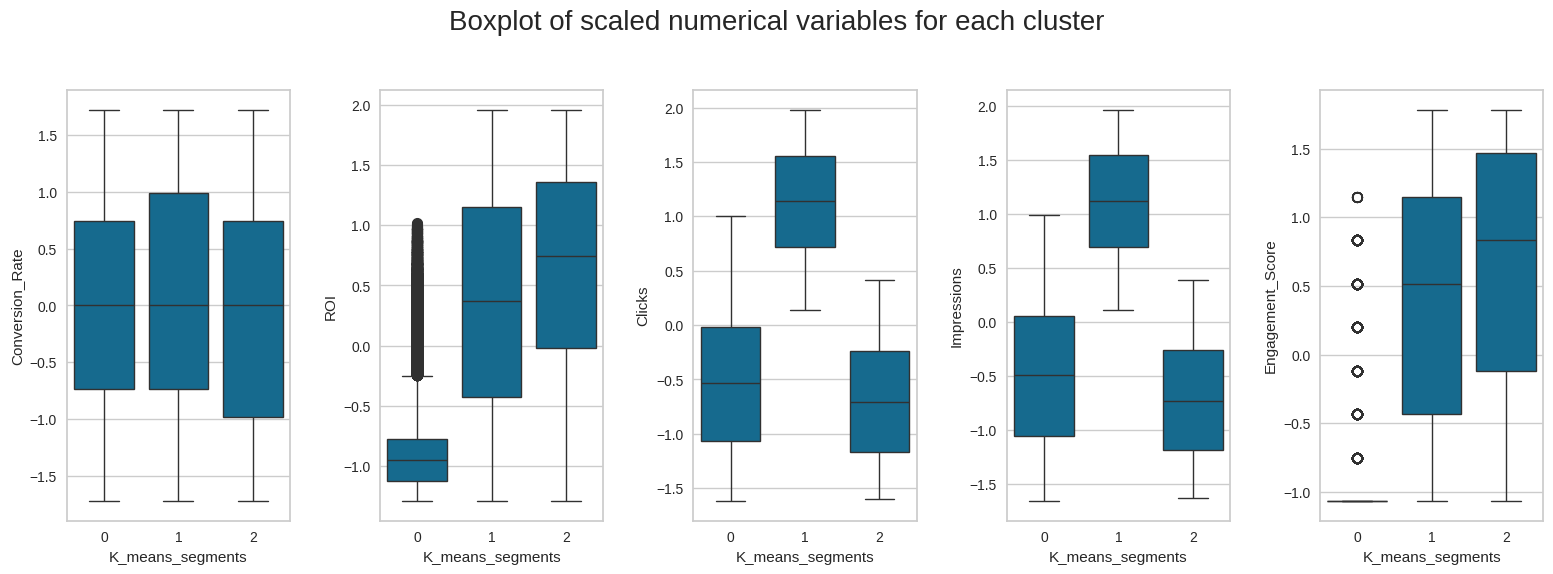

In [62]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

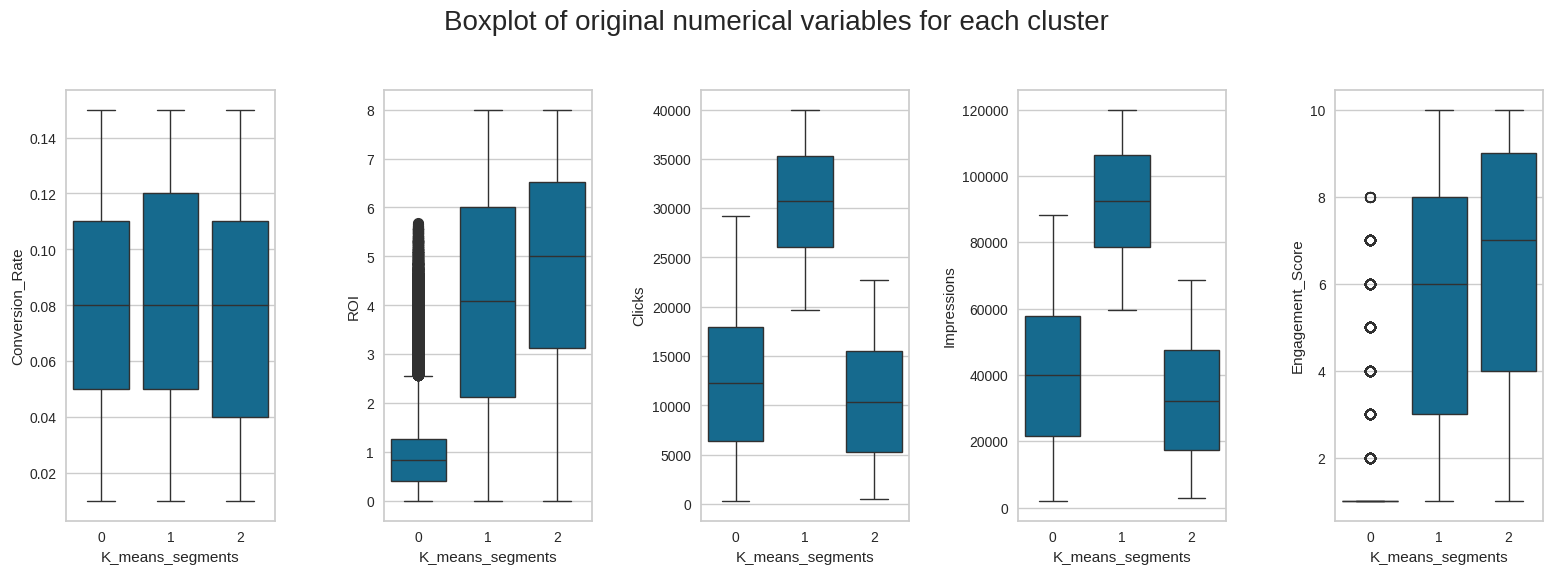

In [63]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

## Insights

- **Cluster 0**:
   

#### Let's compare Cluster vs Brand

In [ ]:
pd.crosstab(df.K_means_segments, df.Brand).style.highlight_max(
    color="lightgreen", axis=0
)

Brand,Adidas Adidas ORIGINALS,Adidas CORE / NEO,Adidas ORIGINALS,Adidas SPORT PERFORMANCE,Nike
K_means_segments,,,,,
0,0,18,53,23,173
1,0,227,166,101,169
2,1,866,564,356,0
3,0,0,123,126,185


**Observations**

- Adidas gives more discounts on their products, while Nike barely gives any.
- Nearly one-third of Nike products are premium in nature.

## Business Recommendations